In [ ]:
#CAPSTONE NOTEBOOK - EXPLORE NEURAL NETWORK AND OTHER IDEAS
#just a little extra work to see of the

In [10]:
#list of libraries used thoughout the jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#read datafiles into pandas
red_vinho = pd.read_csv('winequality-red.csv', sep=';')



In [4]:

red_vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#TRANSFORM (RE-MAP) THE 'QUALITY' SCORE
#mapping the 'quality' as Not Good, Good, Very Good
#first make an idependent copy of the red_vinho dataset just to make sure there is not accidental affect on the work above
red_vinho_mapped = red_vinho.copy()

In [7]:
#map the exisitng 'quality' ratings of 3 to 8 into these 3 new classes
#the new classes are string values, but will be numerically ordinal encoded where needed
red_vinho_mapped = red_vinho_mapped.replace({'quality' : {
                                    8 : 'Very Good',
                                    7 : 'Very Good',
                                    6 : 'Good',
                                    5 : 'Good',
                                    4 : 'Not Good',
                                    3 : 'Not Good',

        }}
)

In [8]:
#the classes (categories) still remain imbalanced, but this is probably reasonable as we would expect most wines to fall in the
#middle class of 'Good' and considerably fewer to be 'Very Good'
red_vinho_mapped['quality'].value_counts()

,count
quality,
Good,1319
Very Good,217
Not Good,63


In [11]:
#create test and train datasets from red_vinho_mapped
X_mapped = red_vinho_mapped.drop('quality', axis=1)
y_mapped = red_vinho_mapped['quality']
X_train_mapped, X_test_mapped, y_train_mapped, y_test_mapped = train_test_split(X_mapped, y_mapped, test_size=0.2, random_state=42)

In [ ]:
#NEURAL NETWORK WITH 3 CLASSES
#Just for learning purposes I want to see how a neural network performs on this wine classification problem

In [12]:
# Scale the features (X_train_mapped, X_test_mapped)
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

In [13]:
# target variable needs to be encoded
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_mapped)
y_test_encoded = label_encoder.transform(y_test_mapped)
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)


In [19]:



# Will use a neural network with 2 hidden layers and softmax output layer with 3 nodes corresponding to 3 classes

model_3_deep = keras.Sequential([

    keras.layers.Dense(128, activation='relu', input_shape=(X_train_mapped_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax') # 3 output classes: 'Not Good', 'Good', 'Very Good'
])

# Compile the model
model_3_deep.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model summary table
model_3_deep.summary()

# Train model
history = model_3_deep.fit(X_train_mapped_scaled, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# accuracy on the test data
loss, accuracy = model_3_deep.evaluate(X_test_mapped_scaled, y_test_one_hot, verbose=1)
print(f"Neural Network Test Accuracy {accuracy:.4f}")



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,971 (46.76 KB)

 Trainable params: 11,971 (46.76 KB)

 Non-trainable params: 0 (0.00 B)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8719 - loss: 0.5784 
Neural Network Test Accuracy 0.8781


In [18]:
# Add dropout after the first hidden layer to see if that improves performance

model_3_deep_dropout = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_mapped_scaled.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax') # 3 output classes
])

# Compile the model
model_3_deep_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# model summary table
model_3_deep_dropout.summary()

# Train the model
history_dropout = model_3_deep_dropout.fit(X_train_mapped_scaled, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# accuracy on the test data
loss_dropout, accuracy_dropout = model_3_deep_dropout.evaluate(X_test_mapped_scaled, y_test_one_hot, verbose=1)
print(f"Neural Network with Dropout Test Accuracy {accuracy_dropout:.4f}")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,971 (46.76 KB)

 Trainable params: 11,971 (46.76 KB)

 Non-trainable params: 0 (0.00 B)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8721 - loss: 0.3553 
Neural Network with Dropout Test Accuracy: 0.8594


In [21]:
model_4_deep = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_mapped_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'), # Fourth hidden layer
    keras.layers.Dense(3, activation='softmax') # 3 output classes: 'Not Good', 'Good', 'Very Good'
])

# Compile the model
model_4_deep.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model_4_deep.summary()

# Train the model
history_4_deep = model_4_deep.fit(X_train_mapped_scaled, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test data
loss_4_deep, accuracy_4_deep = model_4_deep.evaluate(X_test_mapped_scaled, y_test_one_hot, verbose=1)
print(f"Neural Network (4 hidden layers) Test Accuracy {accuracy_4_deep:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,451 (48.64 KB)

 Trainable params: 12,451 (48.64 KB)

 Non-trainable params: 0 (0.00 B)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8469 - loss: 0.6022 
Neural Network (4 hidden layers) Test Accuracy 0.8594


In [ ]:
#RESULTS
#Results so far neural networks show slightly lower accuracy than Random Forest and SVC models
#perhaps a slightly deeper model would do better, but Savio did mention that there is some research
#that suggest classical models perform as well or better than neural networks on tabular data
#so that seems to hold here

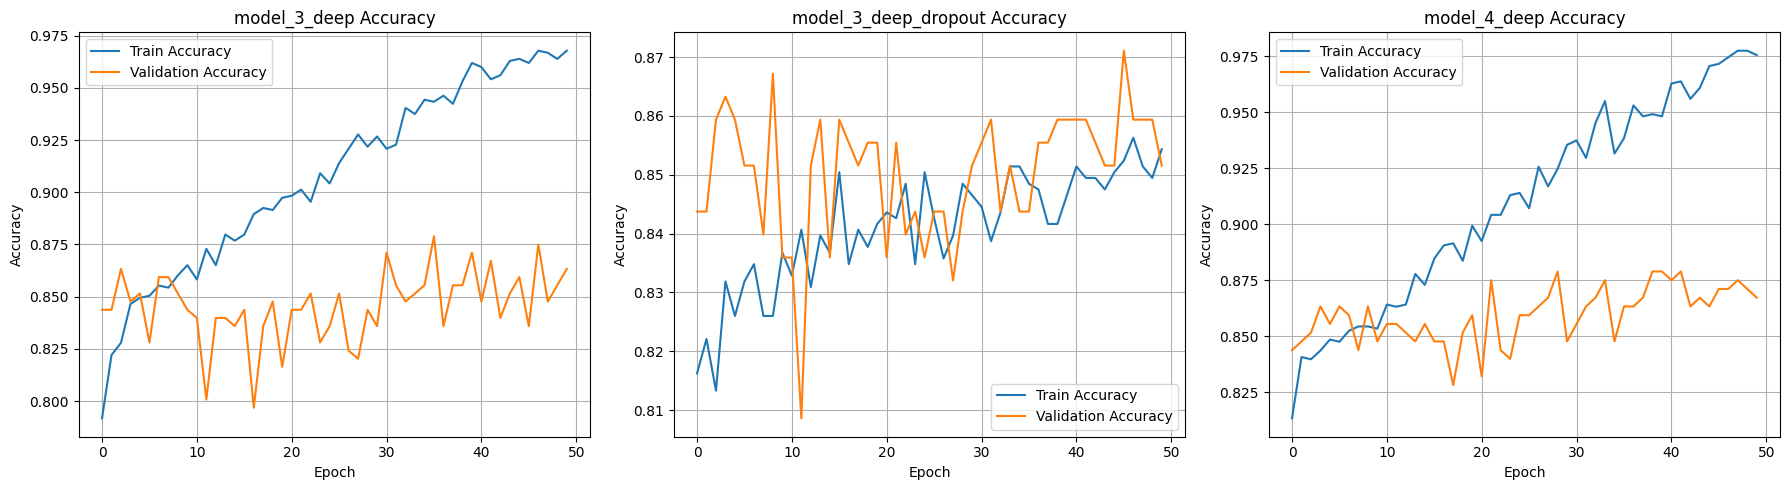

In [24]:
#Plot below shows the training and validation accuracy
#the 4 deep network got to higher validation accuracy earlier (fewer epochs)
#dropout did close the gap (less overfitting) between train and validation accuracy

plt.figure(figsize=(18, 5))

# Plot accuracy for model_3_deep
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model_3_deep Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot accuracy for model_3_deep_dropout
plt.subplot(1, 3, 2)
plt.plot(history_dropout.history['accuracy'], label='Train Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('model_3_deep_dropout Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot accuracy for model_4_deep
plt.subplot(1, 3, 3)
plt.plot(history_4_deep.history['accuracy'], label='Train Accuracy')
plt.plot(history_4_deep.history['val_accuracy'], label='Validation Accuracy')
plt.title('model_4_deep Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()